In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#!/bin/bash
! kaggle datasets download salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 98% 1.04G/1.06G [00:11<00:00, 277MB/s]
100% 1.06G/1.06G [00:11<00:00, 98.6MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - accuracy: 0.5433 - loss: 0.7278 - val_accuracy: 0.6814 - val_loss: 0.6347
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.6561 - loss: 0.6238 - val_accuracy: 0.6732 - val_loss: 0.5866
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.7328 - loss: 0.5357 - val_accuracy: 0.7890 - val_loss: 0.4439
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.7875 - loss: 0.4424 - val_accuracy: 0.8730 - val_loss: 0.2947
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.8570 - loss: 0.3153 - val_accuracy: 0.8976 - val_loss: 0.2388
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.9114 - loss: 0.2161 - val_accuracy: 0.9448 - val_loss: 0.1576
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.9530 - loss: 0.1281 - val_accuracy: 0.9664 - val_loss: 0.1050
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9754 - loss: 0

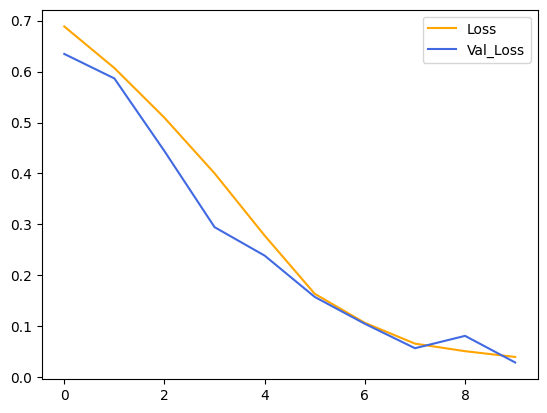

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color="orange", label="Loss")
plt.plot(history.history['val_loss'], color="royalblue", label="Val_Loss")
plt.legend()
plt.show()

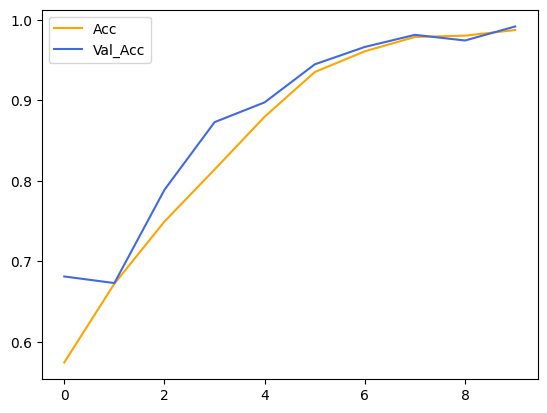

In [14]:
plt.plot(history.history['accuracy'], color="orange", label="Acc")
plt.plot(history.history['val_accuracy'], color="royalblue", label="Val_Acc")
plt.legend()
plt.show()